## Box Geometry

In [3]:
import sys
sys.path.insert(0, '../src')
import TheCov.ThePowerCov

In [1]:
import cov
import numpy as np

k, P0, P2, P4 = np.loadtxt('../postrec/unit/multipoles/RecAni_dk005/UNIELG-b0s15rsd0g1536postmultipoles.txt', unpack=True)

c = cov.GaussianBoxCovariance(Lbox=3750, nbar=3e-3)

c.load_multipole(k, P0, 0)
c.load_multipole(k, P2, 2)
c.load_multipole(k, P4, 4)

c.set_kbins(0.0, 0.5, 0.005)

c.covariance

## Survey Geometry

In [21]:
from nbodykit.source.catalog import CSVCatalog
from nbodykit.lab import cosmology, transform
import cov
import numpy as np
from tqdm.notebook import tqdm

cosmo = cosmology.Cosmology(h=0.7).match(Omega0_m=0.31)

# Let's use a 10x random catalog to make things faster for now

# From: https://data.sdss.org/sas/dr12/boss/lss/dr12_multidark_patchy_mocks/Patchy-Mocks-Randoms-DR12NGC-COMPSAM_V6C_x10.tar.gz
# Columns described in: http://skiesanduniverses.org/Products/MockCatalogues/SDSS/BOSSLRGDR12MDP/
randoms = CSVCatalog('/home/oalves/desi/analytical_covariance/survey_geometry/data/Patchy-Mocks-Randoms-DR12NGC-COMPSAM_V6C_x10.dat',
                     names=['RA', 'DEC', 'Z', 'NZ', 'BIAS', 'VETO FLAG', 'Weight'],
                     delim_whitespace=True)

randoms = randoms[randoms['VETO FLAG'] > 0]
randoms = randoms[(randoms['Z'] > 0.5) * (randoms['Z'] < 0.75)]

randoms['WEIGHT_FKP'] = 1./(1. + 1e4*randoms['NZ'])

randoms['Position'] = transform.SkyToCartesian(
    randoms['RA'], randoms['DEC'], randoms['Z'], degrees=True, cosmo=cosmo)

c = cov.GaussianSurveyWindowCovariance()
c.set_randoms(randoms, 48, 3750, 1/10)
c.compute_cartesian_ffts(tqdm=tqdm)
# c.save_cartesian_ffts('./cartesian_ffts.npz')

Computing moments of W12
Computing 0th order moment... Done!
Computing 2nd order moments


  0%|          | 0/6.0 [00:00<?, ?it/s]


KeyboardInterrupt



In [22]:
c = cov.GaussianSurveyWindowCovariance()
c.load_cartesian_ffts('./cartesian_ffts.npz')
c.set_kbins(0., 0.25, 0.005)
c.compute_window_kernels(kmodes_sampled=250, icut=15, tqdm=tqdm)

Sorting k-modes in shells:   0%|          | 0/50 [00:00<?, ?it/s]

Computing window kernels:   0%|          | 0/50 [00:00<?, ?it/s]

Row 0:   0%|          | 0/93 [00:00<?, ?it/s]

Row 1:   0%|          | 0/250 [00:00<?, ?it/s]

Row 2:   0%|          | 0/250 [00:00<?, ?it/s]

Row 3:   0%|          | 0/250 [00:00<?, ?it/s]

Row 4:   0%|          | 0/250 [00:00<?, ?it/s]

Row 5:   0%|          | 0/250 [00:00<?, ?it/s]

Row 6:   0%|          | 0/250 [00:00<?, ?it/s]

Row 7:   0%|          | 0/250 [00:00<?, ?it/s]

Row 8:   0%|          | 0/250 [00:00<?, ?it/s]

Row 9:   0%|          | 0/250 [00:00<?, ?it/s]

Row 10:   0%|          | 0/250 [00:00<?, ?it/s]

Row 11:   0%|          | 0/250 [00:00<?, ?it/s]

Row 12:   0%|          | 0/250 [00:00<?, ?it/s]

Row 13:   0%|          | 0/250 [00:00<?, ?it/s]

Row 14:   0%|          | 0/250 [00:00<?, ?it/s]

Row 15:   0%|          | 0/250 [00:00<?, ?it/s]

Row 16:   0%|          | 0/250 [00:00<?, ?it/s]

Row 17:   0%|          | 0/250 [00:00<?, ?it/s]

Row 18:   0%|          | 0/250 [00:00<?, ?it/s]

Row 19:   0%|          | 0/250 [00:00<?, ?it/s]

Row 20:   0%|          | 0/250 [00:00<?, ?it/s]

Row 21:   0%|          | 0/250 [00:00<?, ?it/s]

Row 22:   0%|          | 0/250 [00:00<?, ?it/s]

Row 23:   0%|          | 0/250 [00:00<?, ?it/s]

Row 24:   0%|          | 0/250 [00:00<?, ?it/s]

Row 25:   0%|          | 0/250 [00:00<?, ?it/s]

Row 26:   0%|          | 0/250 [00:00<?, ?it/s]

Row 27:   0%|          | 0/250 [00:00<?, ?it/s]

Row 28:   0%|          | 0/250 [00:00<?, ?it/s]

Row 29:   0%|          | 0/250 [00:00<?, ?it/s]

Row 30:   0%|          | 0/250 [00:00<?, ?it/s]

Row 31:   0%|          | 0/250 [00:00<?, ?it/s]

Row 32:   0%|          | 0/250 [00:00<?, ?it/s]

Row 33:   0%|          | 0/250 [00:00<?, ?it/s]

Row 34:   0%|          | 0/250 [00:00<?, ?it/s]

Row 35:   0%|          | 0/250 [00:00<?, ?it/s]

Row 36:   0%|          | 0/250 [00:00<?, ?it/s]

Row 37:   0%|          | 0/250 [00:00<?, ?it/s]

Row 38:   0%|          | 0/250 [00:00<?, ?it/s]

Row 39:   0%|          | 0/250 [00:00<?, ?it/s]

Row 40:   0%|          | 0/250 [00:00<?, ?it/s]

Row 41:   0%|          | 0/250 [00:00<?, ?it/s]

Row 42:   0%|          | 0/250 [00:00<?, ?it/s]

Row 43:   0%|          | 0/250 [00:00<?, ?it/s]

Row 44:   0%|          | 0/250 [00:00<?, ?it/s]

Row 45:   0%|          | 0/250 [00:00<?, ?it/s]

Row 46:   0%|          | 0/250 [00:00<?, ?it/s]

Row 47:   0%|          | 0/250 [00:00<?, ?it/s]

Row 48:   0%|          | 0/250 [00:00<?, ?it/s]

Row 49:   0%|          | 0/250 [00:00<?, ?it/s]

In [24]:
k, P0, P2, P4 = np.loadtxt('../postrec/unit/multipoles/RecAni_dk005/UNIELG-b0s15rsd0g1536postmultipoles.txt', unpack=True)

c.load_multipole(k, P0, 0)
c.load_multipole(k, P2, 2)
c.load_multipole(k, P4, 4)

c.compute_covariance()

In [52]:
import cov
import numpy as np

c = cov.GaussianSurveyWindowCovariance()

c.load_cartesian_ffts('./cartesian_ffts.npz')
c.load_window_kernels('./winkernels.npz')

k  = np.loadtxt('../drive/k_Patchy.dat')
P0 = np.loadtxt('../drive/P0_fit_Patchy.dat')
P2 = np.loadtxt('../drive/P0_fit_Patchy.dat')
P4 = np.loadtxt('../drive/P0_fit_Patchy.dat')

# k, P0, P2, P4 = np.loadtxt('../postrec/unit/multipoles/RecAni_dk005/UNIELG-b0s15rsd0g1536postmultipoles.txt', unpack=True)

c.load_multipole(k, P0, 0)
c.load_multipole(k, P2, 2)
c.load_multipole(k, P4, 4)

c.set_kbins(0., 0.25, 0.005)

c.compute_covariance()

In [42]:
c.I['22'] = 874.224835580588

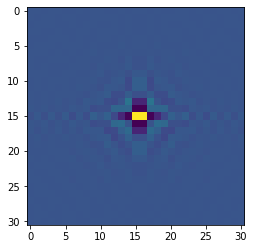

In [44]:
icut=15
cutW = lambda W: W[W.shape[0]//2-icut-1 : W.shape[0]//2+icut,
                   W.shape[1]//2-icut-1 : W.shape[1]//2+icut,
                   W.shape[2]//2-icut-1 : W.shape[2]//2+icut]

Wcut = {key: cutW(c.W[key]) for key in c.W.keys()}

plot.imshow(np.real(Wcut['22'][15,:,:]))

0.6159811019897461

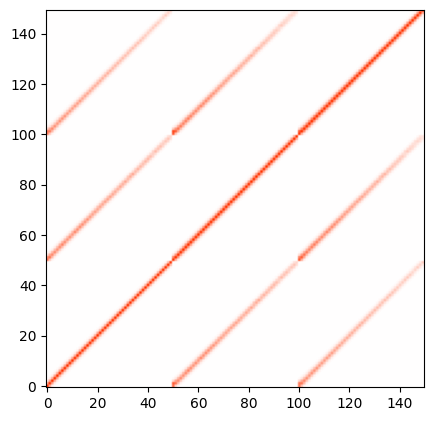

In [45]:
import matplotlib.pyplot as plot
from   matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list("cmap_name", ['#04f', '#fff', '#f30'])

plot.figure(figsize=(5,5), dpi=100)
plot.imshow(c.correlation, origin='lower', vmin=-1, vmax=1, cmap=cmap)

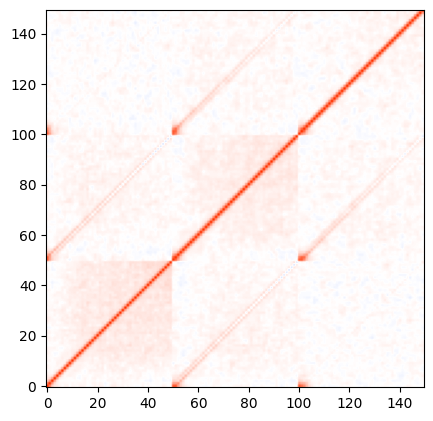

In [47]:
import matplotlib.pyplot as plot
from   matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list("cmap_name", ['#04f', '#fff', '#f30'])

plot.figure(figsize=(5,5), dpi=100)
mockcov = np.loadtxt('../drive/Patchy_CovarianceMatrix.dat')
mockcor = cov.BaseCovariance.cov2corr(mockcov)
plot.imshow(mockcor, origin='lower', vmin=-1, vmax=1, cmap=cmap)

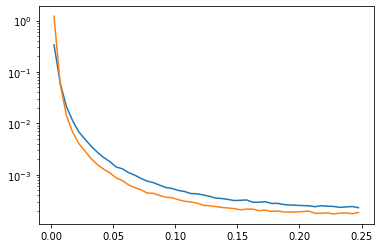

In [53]:
plot.semilogy(c._k, (c.I['22']/874.224835580588)**2*np.diag(c.covariance)[:len(c._k)]/c._P[0](c._k)**2)
plot.semilogy(c._k, np.diag(mockcov)[:len(c._k)]/c._P[0](c._k)**2)

In [56]:
from scipy.io import FortranFile
import numpy as np

# Total number of k-bins in power spectrum
nBins=50
kBinWidth=0.005
# Length of box used when computing FFTs
Lbox=3750.
# Fundamental k-mode
kfun=2.*np.pi/Lbox
kbinEdges=np.arange(nBins+1)*kBinWidth

I22=874.224835580588 # Eq.3

dire='/home/oalves/desi/analytical_covariance/drive/'

# First rewriting the FFT array so that the zero mode is at the center (negative k to left of it and positive to right)
# This is done so that dot products of the FFTs with k-hat can be conveniently taken later 

# As the window falls steeply with k, only low-k regions are needed for the calculation.
# Therefore cutting out the high-k modes in the FFTs using the icut parameter
icut=15; # needs to be less than Lm//2 (Lm: size of FFT)

def fft(temp):
    ia=Lm//2-1; ib=Lm//2+1
    temp2=np.zeros((Lm,Lm,Lm),dtype='<c8')
    temp2[ia:Lm,ia:Lm,ia:Lm]=temp[0:ib,0:ib,0:ib]; temp2[0:ia,ia:Lm,ia:Lm]=temp[ib:Lm,0:ib,0:ib]
    temp2[ia:Lm,0:ia,ia:Lm]=temp[0:ib,ib:Lm,0:ib]; temp2[ia:Lm,ia:Lm,0:ia]=temp[0:ib,0:ib,ib:Lm]
    temp2[0:ia,0:ia,ia:Lm]=temp[ib:Lm,ib:Lm,0:ib]; temp2[0:ia,ia:Lm,0:ia]=temp[ib:Lm,0:ib,ib:Lm]
    temp2[ia:Lm,0:ia,0:ia]=temp[0:ib,ib:Lm,ib:Lm]; temp2[0:ia,0:ia,0:ia]=temp[ib:Lm,ib:Lm,ib:Lm]
    
    temp2=temp2[ia-icut:ia+icut+1,ia-icut:ia+icut+1,ia-icut:ia+icut+1]
    
    if(W22_flag): return(temp2)
    else: return(np.conj(temp2))

# Reading the FFT files for W22 (referred to as W for brevity)
# Wc refers to conjugate of W
f = FortranFile(dire+'FFTWinFun_HighZ_W22_NGC', 'r')
Lm=f.read_record('<i4'); Lm=Lm[0]; #Lm: size of FFT
print('FFT size is',Lm)
W22_flag=1
W=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
Wxx=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
Wyy=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
Wzz=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
Wxy=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
Wyz=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
Wzx=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
Wxxxx=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
Wyyyy=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
Wzzzz=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
Wxxxy=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
Wxxxz=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
Wyyyx=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
Wyyyz=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
Wzzzx=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
Wzzzy=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
Wxxyy=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
Wxxzz=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
Wyyzz=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
Wxxyz=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
Wyyxz=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
Wzzxy=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)

# For W12 instead of W22 above
f = FortranFile(dire+'FFTWinFun_HighZ_W12_NGC', 'r')
Lm=f.read_record('<i4'); Lm=Lm[0];
W22_flag=0
W12=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
W12xx=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
W12yy=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
W12zz=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
W12xy=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
W12yz=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
W12zx=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
W12xxxx=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
W12yyyy=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
W12zzzz=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
W12xxxy=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
W12xxxz=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
W12yyyx=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
W12yyyz=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
W12zzzx=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
W12zzzy=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
W12xxyy=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
W12xxzz=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
W12yyzz=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
W12xxyz=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
W12yyxz=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)
W12zzxy=fft(f.read_record('('+str(Lm)+','+str(Lm)+','+str(Lm)+')<c8').T)

FFT size is 48


In [60]:
# Recording the k-modes in different shells
# Bin_kmodes contains [kx,ky,kz,radius] values of all the modes in the bin

Lm2 = int(kBinWidth*nBins/kfun)+1
[ix,iy,iz] = np.zeros((3,2*Lm2+1,2*Lm2+1,2*Lm2+1));
Bin_kmodes=[]; Bin_ModeNum=np.zeros(nBins,dtype=int)

for i in range(nBins): Bin_kmodes.append([])
for i in range(len(ix)):
    ix[i,:,:]+=i-Lm2; iy[:,i,:]+=i-Lm2; iz[:,:,i]+=i-Lm2

rk=np.sqrt(ix**2+iy**2+iz**2)
sort=(rk*kfun/kBinWidth).astype(int)

for i in range(0,nBins):
    ind=(sort==i); Bin_ModeNum[i]=len(ix[ind]); \
    Bin_kmodes[i]=np.hstack((ix[ind].reshape(-1,1),iy[ind].reshape(-1,1),iz[ind].reshape(-1,1),rk[ind].reshape(-1,1)))
    
# Gives window kernels for L=0,2,4 auto and cross covariance (instead of only L=0 above)

# Returns an array with [7,15,6] dimensions. 
#    The first dim corresponds to the k-bin of k2 
#    (only 3 bins on each side of diagonal are included as the Gaussian covariance drops quickly away from diagonal)

#    The second dim corresponds to elements to be multiplied by various power spectrum multipoles
#    to obtain the final covariance (see function 'Cij' below)

#    The last dim corresponds to multipoles: [L0xL0,L2xL2,L4xL4,L2xL0,L4xL0,L4xL2]

def WinFun(Nbin):
    avgWij=np.zeros((2*3+1,15,6)); avgW00=np.zeros((2*3+1,15),dtype='<c8');
    avgW22=avgW00.copy(); avgW44=avgW00.copy(); avgW20=avgW00.copy(); avgW40=avgW00.copy(); avgW42=avgW00.copy()
    [ix,iy,iz,k2xh,k2yh,k2zh]=np.zeros((6,2*icut+1,2*icut+1,2*icut+1))
    
    for i in range(2*icut+1): 
        ix[i,:,:]+=i-icut; iy[:,i,:]+=i-icut; iz[:,:,i]+=i-icut
        
    if (kmodes_sampled<Bin_ModeNum[Nbin]):
        norm=kmodes_sampled
        sampled=(np.random.rand(kmodes_sampled)*Bin_ModeNum[Nbin]).astype(int)
    else:
        norm=Bin_ModeNum[Nbin]
        sampled=np.arange(Bin_ModeNum[Nbin],dtype=int)
    
    # Randomly select a mode in the k1 bin
    for n in sampled:
        [ik1x,ik1y,ik1z,rk1]=Bin_kmodes[Nbin][n]
        if (rk1==0.): k1xh=0; k1yh=0; k1zh=0
        else: k1xh=ik1x/rk1; k1yh=ik1y/rk1; k1zh=ik1z/rk1
            
    # Build a 3D array of modes around the selected mode   
        k2xh=ik1x-ix; k2yh=ik1y-iy; k2zh=ik1z-iz;
        rk2=np.sqrt(k2xh**2+k2yh**2+k2zh**2);
        sort=(rk2*kfun/kBinWidth).astype(int)-Nbin # to decide later which shell the k2 mode belongs to
        ind=(rk2==0);
        if (ind.any()>0): rk2[ind]=1e10
        k2xh/=rk2; k2yh/=rk2; k2zh/=rk2;
        #k2 hat arrays built
        
    # Now calculating window multipole kernels by taking dot products of cartesian FFTs with k1-hat, k2-hat arrays
    # W corresponds to W22(k) and Wc corresponds to conjugate of W22(k)
    # L(i) refers to multipoles
        
        W_L0 = W
        Wc_L0 = np.conj(W)
        
        xx=Wxx*k1xh**2+Wyy*k1yh**2+Wzz*k1zh**2+2.*Wxy*k1xh*k1yh+2.*Wyz*k1yh*k1zh+2.*Wzx*k1zh*k1xh
        
        W_k1L2=1.5*xx-0.5*W
        W_k2L2=1.5*(Wxx*k2xh**2+Wyy*k2yh**2+Wzz*k2zh**2 \
        +2.*Wxy*k2xh*k2yh+2.*Wyz*k2yh*k2zh+2.*Wzx*k2zh*k2xh)-0.5*W
        Wc_k1L2=np.conj(W_k1L2)
        Wc_k2L2=np.conj(W_k2L2)
        
        W_k1L4=35./8.*(Wxxxx*k1xh**4 +Wyyyy*k1yh**4+Wzzzz*k1zh**4 \
     +4.*Wxxxy*k1xh**3*k1yh +4.*Wxxxz*k1xh**3*k1zh +4.*Wyyyx*k1yh**3*k1xh \
     +4.*Wyyyz*k1yh**3*k1zh +4.*Wzzzx*k1zh**3*k1xh +4.*Wzzzy*k1zh**3*k1yh \
     +6.*Wxxyy*k1xh**2*k1yh**2+6.*Wxxzz*k1xh**2*k1zh**2+6.*Wyyzz*k1yh**2*k1zh**2 \
     +12.*Wxxyz*k1xh**2*k1yh*k1zh+12.*Wyyxz*k1yh**2*k1xh*k1zh +12.*Wzzxy*k1zh**2*k1xh*k1yh) \
     -5./2.*W_k1L2 -7./8.*W_L0
        Wc_k1L4=np.conj(W_k1L4)
        
        k1k2=Wxxxx*(k1xh*k2xh)**2+Wyyyy*(k1yh*k2yh)**2+Wzzzz*(k1zh*k2zh)**2 \
            +Wxxxy*(k1xh*k1yh*k2xh**2+k1xh**2*k2xh*k2yh)*2\
            +Wxxxz*(k1xh*k1zh*k2xh**2+k1xh**2*k2xh*k2zh)*2\
            +Wyyyz*(k1yh*k1zh*k2yh**2+k1yh**2*k2yh*k2zh)*2\
            +Wzzzy*(k1zh*k1yh*k2zh**2+k1zh**2*k2zh*k2yh)*2\
            +Wyyyx*(k1yh*k1xh*k2yh**2+k1yh**2*k2yh*k2xh)*2\
            +Wzzzx*(k1zh*k1xh*k2zh**2+k1zh**2*k2zh*k2xh)*2\
            +Wxxyy*(k1xh**2*k2yh**2+k1yh**2*k2xh**2+4.*k1xh*k1yh*k2xh*k2yh)\
            +Wxxzz*(k1xh**2*k2zh**2+k1zh**2*k2xh**2+4.*k1xh*k1zh*k2xh*k2zh)\
            +Wyyzz*(k1yh**2*k2zh**2+k1zh**2*k2yh**2+4.*k1yh*k1zh*k2yh*k2zh)\
            +Wyyxz*(k1xh*k1zh*k2yh**2+k1yh**2*k2xh*k2zh+2.*k1yh*k2yh*(k1zh*k2xh+k1xh*k2zh))*2\
            +Wxxyz*(k1yh*k1zh*k2xh**2+k1xh**2*k2yh*k2zh+2.*k1xh*k2xh*(k1zh*k2yh+k1yh*k2zh))*2\
            +Wzzxy*(k1yh*k1xh*k2zh**2+k1zh**2*k2yh*k2xh+2.*k1zh*k2zh*(k1xh*k2yh+k1yh*k2xh))*2
        
        W_k2L4=35./8.*(Wxxxx*k2xh**4 +Wyyyy*k2yh**4+Wzzzz*k2zh**4 \
     +4.*Wxxxy*k2xh**3*k2yh +4.*Wxxxz*k2xh**3*k2zh +4.*Wyyyx*k2yh**3*k2xh \
     +4.*Wyyyz*k2yh**3*k2zh +4.*Wzzzx*k2zh**3*k2xh +4.*Wzzzy*k2zh**3*k2yh \
     +6.*Wxxyy*k2xh**2*k2yh**2+6.*Wxxzz*k2xh**2*k2zh**2+6.*Wyyzz*k2yh**2*k2zh**2 \
     +12.*Wxxyz*k2xh**2*k2yh*k2zh+12.*Wyyxz*k2yh**2*k2xh*k2zh +12.*Wzzxy*k2zh**2*k2xh*k2yh) \
     -5./2.*W_k2L2 -7./8.*W_L0
        Wc_k2L4=np.conj(W_k2L4)
        
        W_k1L2_k2L2= 9./4.*k1k2 -3./4.*xx -1./2.*W_k2L2
        W_k1L2_k2L4=2/7.*W_k1L2+20/77.*W_k1L4 #approximate as 6th order FFTs not simulated
        W_k1L4_k2L2=W_k1L2_k2L4 #approximate
        W_k1L4_k2L4=1/9.*W_L0+100/693.*W_k1L2+162/1001.*W_k1L4
        Wc_k1L2_k2L2= np.conj(W_k1L2_k2L2)
        Wc_k1L2_k2L4=np.conj(W_k1L2_k2L4); Wc_k1L4_k2L2=Wc_k1L2_k2L4
        Wc_k1L4_k2L4=np.conj(W_k1L4_k2L4)
        
        k1k2W12=W12xxxx*(k1xh*k2xh)**2+W12yyyy*(k1yh*k2yh)**2+W12zzzz*(k1zh*k2zh)**2 \
            +W12xxxy*(k1xh*k1yh*k2xh**2+k1xh**2*k2xh*k2yh)*2\
            +W12xxxz*(k1xh*k1zh*k2xh**2+k1xh**2*k2xh*k2zh)*2\
            +W12yyyz*(k1yh*k1zh*k2yh**2+k1yh**2*k2yh*k2zh)*2\
            +W12zzzy*(k1zh*k1yh*k2zh**2+k1zh**2*k2zh*k2yh)*2\
            +W12yyyx*(k1yh*k1xh*k2yh**2+k1yh**2*k2yh*k2xh)*2\
            +W12zzzx*(k1zh*k1xh*k2zh**2+k1zh**2*k2zh*k2xh)*2\
            +W12xxyy*(k1xh**2*k2yh**2+k1yh**2*k2xh**2+4.*k1xh*k1yh*k2xh*k2yh)\
            +W12xxzz*(k1xh**2*k2zh**2+k1zh**2*k2xh**2+4.*k1xh*k1zh*k2xh*k2zh)\
            +W12yyzz*(k1yh**2*k2zh**2+k1zh**2*k2yh**2+4.*k1yh*k1zh*k2yh*k2zh)\
            +W12yyxz*(k1xh*k1zh*k2yh**2+k1yh**2*k2xh*k2zh+2.*k1yh*k2yh*(k1zh*k2xh+k1xh*k2zh))*2\
            +W12xxyz*(k1yh*k1zh*k2xh**2+k1xh**2*k2yh*k2zh+2.*k1xh*k2xh*(k1zh*k2yh+k1yh*k2zh))*2\
            +W12zzxy*(k1yh*k1xh*k2zh**2+k1zh**2*k2yh*k2xh+2.*k1zh*k2zh*(k1xh*k2yh+k1yh*k2xh))*2
        
        xxW12=W12xx*k1xh**2+W12yy*k1yh**2+W12zz*k1zh**2+2.*W12xy*k1xh*k1yh+2.*W12yz*k1yh*k1zh+2.*W12zx*k1zh*k1xh
    
        W12_L0 = W12
        W12_k1L2=1.5*xxW12-0.5*W12
        W12_k1L4=35./8.*(W12xxxx*k1xh**4 +W12yyyy*k1yh**4+W12zzzz*k1zh**4 \
     +4.*W12xxxy*k1xh**3*k1yh +4.*W12xxxz*k1xh**3*k1zh +4.*W12yyyx*k1yh**3*k1xh \
     +6.*W12xxyy*k1xh**2*k1yh**2+6.*W12xxzz*k1xh**2*k1zh**2+6.*W12yyzz*k1yh**2*k1zh**2 \
     +12.*W12xxyz*k1xh**2*k1yh*k1zh+12.*W12yyxz*k1yh**2*k1xh*k1zh +12.*W12zzxy*k1zh**2*k1xh*k1yh) \
     -5./2.*W12_k1L2 -7./8.*W12_L0
        W12_k1L4_k2L2=2/7.*W12_k1L2+20/77.*W12_k1L4
        W12_k1L4_k2L4=1/9.*W12_L0+100/693.*W12_k1L2+162/1001.*W12_k1L4
        W12_k2L2=1.5*(W12xx*k2xh**2+W12yy*k2yh**2+W12zz*k2zh**2\
        +2.*W12xy*k2xh*k2yh+2.*W12yz*k2yh*k2zh+2.*W12zx*k2zh*k2xh)-0.5*W12
        W12_k2L4=35./8.*(W12xxxx*k2xh**4 +W12yyyy*k2yh**4+W12zzzz*k2zh**4 \
     +4.*W12xxxy*k2xh**3*k2yh +4.*W12xxxz*k2xh**3*k2zh +4.*W12yyyx*k2yh**3*k2xh \
     +4.*W12yyyz*k2yh**3*k2zh +4.*W12zzzx*k2zh**3*k2xh +4.*W12zzzy*k2zh**3*k2yh \
     +6.*W12xxyy*k2xh**2*k2yh**2+6.*W12xxzz*k2xh**2*k2zh**2+6.*W12yyzz*k2yh**2*k2zh**2 \
     +12.*W12xxyz*k2xh**2*k2yh*k2zh+12.*W12yyxz*k2yh**2*k2xh*k2zh +12.*W12zzxy*k2zh**2*k2xh*k2yh) \
     -5./2.*W12_k2L2 -7./8.*W12_L0
        
        W12_k1L2_k2L2= 9./4.*k1k2W12 -3./4.*xxW12 -1./2.*W12_k2L2
        
        W_k1L2_Sumk2L22=1/5.*W_k1L2+2/7.*W_k1L2_k2L2+18/35.*W_k1L2_k2L4
        W_k1L2_Sumk2L24=2/7.*W_k1L2_k2L2+20/77.*W_k1L2_k2L4
        W_k1L4_Sumk2L22=1/5.*W_k1L4+2/7.*W_k1L4_k2L2+18/35.*W_k1L4_k2L4
        W_k1L4_Sumk2L24=2/7.*W_k1L4_k2L2+20/77.*W_k1L4_k2L4
        W_k1L4_Sumk2L44=1/9.*W_k1L4+100/693.*W_k1L4_k2L2+162/1001.*W_k1L4_k2L4
        
        C00exp = [Wc_L0*W_L0,Wc_L0*W_k2L2,Wc_L0*W_k2L4,\
                Wc_k1L2*W_L0,Wc_k1L2*W_k2L2,Wc_k1L2*W_k2L4,\
                Wc_k1L4*W_L0,Wc_k1L4*W_k2L2,Wc_k1L4*W_k2L4]
        
        C00exp += [2.*W_L0*W12_L0,W_k1L2*W12_L0,W_k1L4*W12_L0,\
                W_k2L2*W12_L0,W_k2L4*W12_L0,np.conj(W12_L0)*W12_L0]
        
        C22exp = [Wc_k2L2*W_k1L2 + Wc_L0*W_k1L2_k2L2,\
                Wc_k2L2*W_k1L2_k2L2 + Wc_L0*W_k1L2_Sumk2L22,\
                Wc_k2L2*W_k1L2_k2L4 + Wc_L0*W_k1L2_Sumk2L24,\
                Wc_k1L2_k2L2*W_k1L2 + Wc_k1L2*W_k1L2_k2L2,\
                Wc_k1L2_k2L2*W_k1L2_k2L2 + Wc_k1L2*W_k1L2_Sumk2L22,\
                Wc_k1L2_k2L2*W_k1L2_k2L4 + Wc_k1L2*W_k1L2_Sumk2L24,\
                Wc_k1L4_k2L2*W_k1L2 + Wc_k1L4*W_k1L2_k2L2,\
                Wc_k1L4_k2L2*W_k1L2_k2L2 + Wc_k1L4*W_k1L2_Sumk2L22,\
                Wc_k1L4_k2L2*W_k1L2_k2L4 + Wc_k1L4*W_k1L2_Sumk2L24]
        
        C22exp += [W_k1L2*W12_k2L2 + W_k2L2*W12_k1L2\
                   +W_k1L2_k2L2*W12_L0+W_L0*W12_k1L2_k2L2,\
                 0.5*((1/5.*W_L0+2/7.*W_k1L2+18/35.*W_k1L4)*W12_k2L2 + W_k1L2_k2L2*W12_k1L2\
+(1/5.*W_k2L2+2/7.*W_k1L2_k2L2+18/35.*W_k1L4_k2L2)*W12_L0 + W_k1L2*W12_k1L2_k2L2),\
    0.5*((2/7.*W_k1L2+20/77.*W_k1L4)*W12_k2L2 + W_k1L4_k2L2*W12_k1L2\
+(2/7.*W_k1L2_k2L2+20/77.*W_k1L4_k2L2)*W12_L0 + W_k1L4*W12_k1L2_k2L2),\
0.5*(W_k1L2_k2L2*W12_k2L2+(1/5.*W_L0+2/7.*W_k2L2+18/35.*W_k2L4)*W12_k1L2\
+(1/5.*W_k1L2+2/7.*W_k1L2_k2L2+18/35.*W_k1L2_k2L4)*W12_L0 + W_k2L2*W12_k1L2_k2L2),\
0.5*(W_k1L2_k2L4*W12_k2L2+(2/7.*W_k2L2+20/77.*W_k2L4)*W12_k1L2\
+(2/7.*W_k1L2_k2L2+20/77.*W_k1L2_k2L4)*W12_L0 + W_k2L4*W12_k1L2_k2L2),\
                 np.conj(W12_k1L2_k2L2)*W12_L0+np.conj(W12_k1L2)*W12_k2L2]
        
        C44exp = [Wc_k2L4*W_k1L4 + Wc_L0*W_k1L4_k2L4,\
                Wc_k2L4*W_k1L4_k2L2 + Wc_L0*W_k1L4_Sumk2L24,\
                Wc_k2L4*W_k1L4_k2L4 + Wc_L0*W_k1L4_Sumk2L44,\
                Wc_k1L2_k2L4*W_k1L4 + Wc_k1L2*W_k1L4_k2L4,\
                Wc_k1L2_k2L4*W_k1L4_k2L2 + Wc_k1L2*W_k1L4_Sumk2L24,\
                Wc_k1L2_k2L4*W_k1L4_k2L4 + Wc_k1L2*W_k1L4_Sumk2L44,\
                Wc_k1L4_k2L4*W_k1L4 + Wc_k1L4*W_k1L4_k2L4,\
                Wc_k1L4_k2L4*W_k1L4_k2L2 + Wc_k1L4*W_k1L4_Sumk2L24,\
                Wc_k1L4_k2L4*W_k1L4_k2L4 + Wc_k1L4*W_k1L4_Sumk2L44]
        
        C44exp += [W_k1L4*W12_k2L4 + W_k2L4*W12_k1L4\
                   +W_k1L4_k2L4*W12_L0+W_L0*W12_k1L4_k2L4,\
                 0.5*((2/7.*W_k1L2+20/77.*W_k1L4)*W12_k2L4 + W_k1L2_k2L4*W12_k1L4\
+(2/7.*W_k1L2_k2L4+20/77.*W_k1L4_k2L4)*W12_L0 + W_k1L2*W12_k1L4_k2L4),\
0.5*((1/9.*W_L0+100/693.*W_k1L2+162/1001.*W_k1L4)*W12_k2L4 + W_k1L4_k2L4*W12_k1L4\
+(1/9.*W_k2L4+100/693.*W_k1L2_k2L4+162/1001.*W_k1L4_k2L4)*W12_L0 + W_k1L4*W12_k1L4_k2L4),\
0.5*(W_k1L4_k2L2*W12_k2L4+(2/7.*W_k2L2+20/77.*W_k2L4)*W12_k1L4\
+(2/7.*W_k1L4_k2L2+20/77.*W_k1L4_k2L4)*W12_L0 + W_k2L2*W12_k1L4_k2L4),\
0.5*(W_k1L4_k2L4*W12_k2L4+(1/9.*W_L0+100/693.*W_k2L2+162/1001.*W_k2L4)*W12_k1L4\
+(1/9.*W_k1L4+100/693.*W_k1L4_k2L2+162/1001.*W_k1L4_k2L4)*W12_L0 + W_k2L4*W12_k1L4_k2L4),\
                 np.conj(W12_k1L4_k2L4)*W12_L0+np.conj(W12_k1L4)*W12_k2L4] #1/(nbar)^2
        
        C20exp = [Wc_L0*W_k1L2,Wc_L0*W_k1L2_k2L2,Wc_L0*W_k1L2_k2L4,\
                Wc_k1L2*W_k1L2,Wc_k1L2*W_k1L2_k2L2,Wc_k1L2*W_k1L2_k2L4,\
                Wc_k1L4*W_k1L2,Wc_k1L4*W_k1L2_k2L2,Wc_k1L4*W_k1L2_k2L4]
        
        C20exp += [W_k1L2*W12_L0 + W*W12_k1L2,\
                 0.5*((1/5.*W+2/7.*W_k1L2+18/35.*W_k1L4)*W12_L0 + W_k1L2*W12_k1L2),\
                0.5*((2/7.*W_k1L2+20/77.*W_k1L4)*W12_L0 + W_k1L4*W12_k1L2),\
                0.5*(W_k1L2_k2L2*W12_L0 + W_k2L2*W12_k1L2),\
                 0.5*(W_k1L2_k2L4*W12_L0 + W_k2L4*W12_k1L2),\
                 np.conj(W12_k1L2)*W12_L0]
        
        C40exp = [Wc_L0*W_k1L4,Wc_L0*W_k1L4_k2L2,Wc_L0*W_k1L4_k2L4,\
                Wc_k1L2*W_k1L4,Wc_k1L2*W_k1L4_k2L2,Wc_k1L2*W_k1L4_k2L4,\
                Wc_k1L4*W_k1L4,Wc_k1L4*W_k1L4_k2L2,Wc_k1L4*W_k1L4_k2L4]
        
        C40exp += [W_k1L4*W12_L0 + W*W12_k1L4,\
                 0.5*((2/7.*W_k1L2+20/77.*W_k1L4)*W12_L0 + W_k1L2*W12_k1L4),\
                0.5*((1/9.*W+100/693.*W_k1L2+162/1001.*W_k1L4)*W12_L0 + W_k1L4*W12_k1L4),\
                0.5*(W_k1L4_k2L2*W12_L0 + W_k2L2*W12_k1L4),\
                 0.5*(W_k1L4_k2L4*W12_L0 + W_k2L4*W12_k1L4),\
                 np.conj(W12_k1L4)*W12_L0]
        
        C42exp = [Wc_k2L2*W_k1L4 + Wc_L0*W_k1L4_k2L2,\
                Wc_k2L2*W_k1L4_k2L2 + Wc_L0*W_k1L4_Sumk2L22,\
                Wc_k2L2*W_k1L4_k2L4 + Wc_L0*W_k1L4_Sumk2L24,\
                Wc_k1L2_k2L2*W_k1L4 + Wc_k1L2*W_k1L4_k2L2,\
                Wc_k1L2_k2L2*W_k1L4_k2L2 + Wc_k1L2*W_k1L4_Sumk2L22,\
                Wc_k1L2_k2L2*W_k1L4_k2L4 + Wc_k1L2*W_k1L4_Sumk2L24,\
                Wc_k1L4_k2L2*W_k1L4 + Wc_k1L4*W_k1L4_k2L2,\
                Wc_k1L4_k2L2*W_k1L4_k2L2 + Wc_k1L4*W_k1L4_Sumk2L22,\
                Wc_k1L4_k2L2*W_k1L4_k2L4 + Wc_k1L4*W_k1L4_Sumk2L24]
        
        C42exp += [W_k1L4*W12_k2L2 + W_k2L2*W12_k1L4+\
                   W_k1L4_k2L2*W12_L0+W*W12_k1L4_k2L2,\
                 0.5*((2/7.*W_k1L2+20/77.*W_k1L4)*W12_k2L2 + W_k1L2_k2L2*W12_k1L4\
    +(2/7.*W_k1L2_k2L2+20/77.*W_k1L4_k2L2)*W12_L0 + W_k1L2*W12_k1L4_k2L2),\
    0.5*((1/9.*W+100/693.*W_k1L2+162/1001.*W_k1L4)*W12_k2L2 + W_k1L4_k2L2*W12_k1L4\
+(1/9.*W_k2L2+100/693.*W_k1L2_k2L2+162/1001.*W_k1L4_k2L2)*W12_L0 + W_k1L4*W12_k1L4_k2L2),\
0.5*(W_k1L4_k2L2*W12_k2L2+(1/5.*W+2/7.*W_k2L2+18/35.*W_k2L4)*W12_k1L4\
+(1/5.*W_k1L4+2/7.*W_k1L4_k2L2+18/35.*W_k1L4_k2L4)*W12_L0 + W_k2L2*W12_k1L4_k2L2),\
0.5*(W_k1L4_k2L4*W12_k2L2+(2/7.*W_k2L2+20/77.*W_k2L4)*W12_k1L4\
+(2/7.*W_k1L4_k2L2+20/77.*W_k1L4_k2L4)*W12_L0 + W_k2L4*W12_k1L4_k2L2),\
                 np.conj(W12_k1L4_k2L2)*W12_L0+np.conj(W12_k1L4)*W12_k2L2] #1/(nbar)^2
        
        for i in range(-3,4):
            ind=(sort==i);
            for j in range(15):
                avgW00[i+3,j]+=np.sum(C00exp[j][ind])
                avgW22[i+3,j]+=np.sum(C22exp[j][ind])
                avgW44[i+3,j]+=np.sum(C44exp[j][ind])
                avgW20[i+3,j]+=np.sum(C20exp[j][ind])
                avgW40[i+3,j]+=np.sum(C40exp[j][ind])
                avgW42[i+3,j]+=np.sum(C42exp[j][ind])
            
    for i in range(0,2*3+1):
        if(i+Nbin-3>=nBins or i+Nbin-3<0): 
            avgW00[i]*=0; avgW22[i]*=0; avgW44[i]*=0;
            avgW20[i]*=0; avgW40[i]*=0; avgW42[i]*=0; continue
        avgW00[i]=avgW00[i]/(norm*Bin_ModeNum[Nbin+i-3]*I22**2)
        avgW22[i]=avgW22[i]/(norm*Bin_ModeNum[Nbin+i-3]*I22**2)
        avgW44[i]=avgW44[i]/(norm*Bin_ModeNum[Nbin+i-3]*I22**2)
        avgW20[i]=avgW20[i]/(norm*Bin_ModeNum[Nbin+i-3]*I22**2)
        avgW40[i]=avgW40[i]/(norm*Bin_ModeNum[Nbin+i-3]*I22**2)
        avgW42[i]=avgW42[i]/(norm*Bin_ModeNum[Nbin+i-3]*I22**2)
        
    avgWij[:,:,0]=2.*np.real(avgW00); avgWij[:,:,1]=25.*np.real(avgW22); avgWij[:,:,2]=81.*np.real(avgW44);
    avgWij[:,:,3]=5.*2.*np.real(avgW20); avgWij[:,:,4]=9.*2.*np.real(avgW40); avgWij[:,:,5]=45.*np.real(avgW42);
    return(avgWij)

#Index of the k1-bin for which the window kernels are calculated
k1_bin=40

kmodes_sampled=250 # Number of k-modes sampled in the k1 shell. 
# For final result in paper ~25000 modes are used and the code is run on a cluster 
# (see the snippets at the end of this notebook)

Wij = WinFun(k1_bin)

In [61]:
c.WinKernel[40,3,0,0]

0.6159811019897461

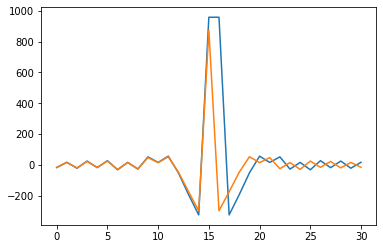

In [72]:
icut=15
cutW = lambda W: W[W.shape[0]//2-icut-1 : W.shape[0]//2+icut,
                   W.shape[1]//2-icut-1 : W.shape[1]//2+icut,
                   W.shape[2]//2-icut-1 : W.shape[2]//2+icut]

Wcut = {key: cutW(c.W[key]) for key in c.W.keys()}

plot.plot(np.real(Wcut['22'][15,15,:]))
plot.plot(np.real(W[15,15,:]))